# Ao vivo

Pontos da aula

*Quantas candidaturas houveram em cada ano agrupado por gênero?

*Qual a faixa etária média das pessoas candidatas?

*Há correlação entre idade, genero e custo da campanha?

*Visualização gráfica da distribuição da variável DS_COR_RACA em 2016.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
dados_pe_rn = glob.glob('base_dados/consulta*.csv')
print(dados_pe_rn)

['base_dados\\consulta_cand_2016_PE.csv', 'base_dados\\consulta_cand_2016_RN.csv', 'base_dados\\consulta_cand_2020_PE.csv', 'base_dados\\consulta_cand_2020_RN.csv']


In [4]:
lista_df = []

for dados_estado in dados_pe_rn:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1', na_values=['#NULO#'],low_memory=False)
    lista_df.append(df_estado)

In [5]:
lista_df[0].columns == lista_df[2].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
print(lista_df[0:2])

[       DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
1      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
2      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
3      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
4      18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
...           ...        ...          ...              ...                ...   
19137  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19138  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19139  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19140  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   
19141  18/02/2021   12:07:20         2016                2  ELEIÇÃO ORDINÁRIA   

       NR_TURNO  CD_ELEICA

In [7]:
df_completo  = pd.concat(lista_df,axis=0, ignore_index=True)
df_completo.shape

(59991, 63)

In [8]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     59991 non-null  object 
 1   HH_GERACAO                     59991 non-null  object 
 2   ANO_ELEICAO                    59991 non-null  int64  
 3   CD_TIPO_ELEICAO                59991 non-null  int64  
 4   NM_TIPO_ELEICAO                59991 non-null  object 
 5   NR_TURNO                       59991 non-null  int64  
 6   CD_ELEICAO                     59991 non-null  int64  
 7   DS_ELEICAO                     59991 non-null  object 
 8   DT_ELEICAO                     59991 non-null  object 
 9   TP_ABRANGENCIA                 59991 non-null  object 
 10  SG_UF                          59991 non-null  object 
 11  SG_UE                          59991 non-null  int64  
 12  NM_UE                          59991 non-null 

In [9]:
df_completo['DS_CARGO'].unique()

array(['VEREADOR', 'VICE-PREFEITO', 'PREFEITO'], dtype=object)

In [10]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'DEFERIDO COM RECURSO',
       'INDEFERIDO COM RECURSO', 'NÃO CONHECIMENTO DO PEDIDO',
       'CANCELADO', 'FALECIDO', 'PENDENTE DE JULGAMENTO',
       'CASSADO COM RECURSO', 'CANCELADO COM RECURSO',
       'PEDIDO NÃO CONHECIDO', 'CASSADO'], dtype=object)

In [12]:
df_vereadores = df_completo[
    (df_completo['CD_CARGO'] == 13) & (
    (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') |
    (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'))
    ].copy()


In [14]:
df_vereadores.shape

(52176, 63)

In [30]:
df_raca_genero = df_vereadores[[
    'ANO_ELEICAO', 'CD_CARGO','NR_PARTIDO','SG_UF','SG_PARTIDO','CD_GENERO', 'DS_GENERO', 
    'CD_COR_RACA', 'DS_COR_RACA','NR_IDADE_DATA_POSSE','VR_DESPESA_MAX_CAMPANHA']].copy()

In [31]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,SG_UF,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,27,PE,PSDC,4,FEMININO,3,PARDA,49.0,96474.36
1,2016,13,22,PE,PR,4,FEMININO,1,BRANCA,26.0,10803.91
2,2016,13,15,PE,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93
3,2016,13,27,PE,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89
4,2016,13,10,PE,PRB,4,FEMININO,3,PARDA,36.0,10803.91


Quantas candidaturas houveram em cada ano agrupado por gênero?

In [32]:
df_raca_genero[['ANO_ELEICAO', 'DS_GENERO','CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count()

CD_CARGO
ANO_ELEICAO DS_GENERO               
2016        FEMININO            7760
            MASCULINO          16622
            NÃO DIVULGÁVEL         1
2020        FEMININO            9398
            MASCULINO          18395

<AxesSubplot:xlabel='ANO_ELEICAO,DS_GENERO'>

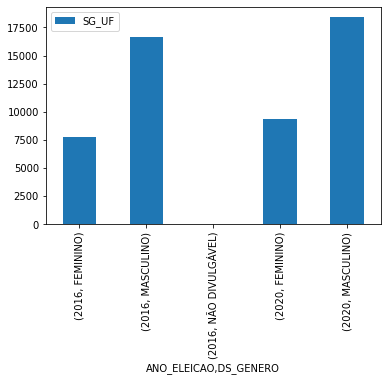

In [33]:
df_raca_genero[['ANO_ELEICAO', 'SG_UF','DS_GENERO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count().plot(kind='bar')


In [37]:
round(df_raca_genero[[
    'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].groupby(by=['DS_GENERO']).mean(),2)

,VR_DESPESA_MAX_CAMPANHA
DS_GENERO,
FEMININO,74018.08
MASCULINO,78522.27
NÃO DIVULGÁVEL,-4.00


Qual a faixa etária média das pessoas candidatas?

In [38]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,SG_UF,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2016,13,27,PE,PSDC,4,FEMININO,3,PARDA,49.0,96474.36
1,2016,13,22,PE,PR,4,FEMININO,1,BRANCA,26.0,10803.91
2,2016,13,15,PE,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93
3,2016,13,27,PE,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89
4,2016,13,10,PE,PRB,4,FEMININO,3,PARDA,36.0,10803.91


In [41]:
round(df_raca_genero.describe(),2)

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,CD_GENERO,CD_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
count,52176.00,52176.0,52176.00,52176.00,52176.00,52175.00,52176.00
mean,2018.13,13.0,33.53,2.66,2.16,43.68,77039.57
std,2.00,0.0,21.00,0.94,0.99,12.09,175501.42
min,2016.00,13.0,10.00,-4.00,-4.00,18.00,-4.00
25%,2016.00,13.0,15.00,2.00,1.00,35.00,12307.75
50%,2020.00,13.0,25.00,2.00,3.00,43.00,22928.82
75%,2020.00,13.0,45.00,4.00,3.00,51.00,46624.95
max,2020.00,13.0,90.00,4.00,6.00,999.00,1011149.65


In [42]:
cortes = [18,25,35,45,55,65,100]
categorias = ['18 a 24', '25 a 34', '35 a 44', '45 a 54', '55 a 64', 'acima de 64']
df_raca_genero['FAIXA_ETARIA'] = \
    pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'], cortes, labels=categorias, include_lowest=True )


In [43]:
df_raca_genero.head()


,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,SG_UF,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
0,2016,13,27,PE,PSDC,4,FEMININO,3,PARDA,49.0,96474.36,45 a 54
1,2016,13,22,PE,PR,4,FEMININO,1,BRANCA,26.0,10803.91,25 a 34
2,2016,13,15,PE,PMDB,2,MASCULINO,3,PARDA,40.0,16678.93,35 a 44
3,2016,13,27,PE,PSDC,2,MASCULINO,1,BRANCA,39.0,21221.89,35 a 44
4,2016,13,10,PE,PRB,4,FEMININO,3,PARDA,36.0,10803.91,35 a 44


In [49]:
df_raca_genero['FAIXA_ETARIA'].mode()

0    35 a 44
Name: FAIXA_ETARIA, dtype: category
Categories (6, object): ['18 a 24' < '25 a 34' < '35 a 44' < '45 a 54' < '55 a 64' < 'acima de 64']

Visualização gráfica da distribuição da variável DS_COR_RACA em 2016